DATA INTERPRETATION PLOT CREATED BY MUHAMMAD RAFI
########  copyright ########

#Written by Geologging WinLogger V1.5/410
~VERSION INFORMATION
#------------------------------------------------------------------------------
 VERS. 2.0 : CWLS LOG ASCII STANDARD - VERSION 2.0
 WRAP. NO  : ONE LINE PER DEPTH STEP
~WELL INFORMATION
#MNEM.UNIT         DATA                                DESCRIPTION OF MNEMONIC
#------------------------------------------------------------------------------
 STRT.M          1.7600                            :   START DEPTH
 STOP.M        104.5300                            :   STOP DEPTH
 STEP.M          0.0100                            :   STEP VALUE
 NULL.        -999.2500                            :   NULL VALUE
 COMP.    PT. TPS                                  :   COMPANY NAME
 WELL.    TPS_27                                   :   WELL NAME
 FLD.     DESA *******                             :   FIELD NAME
 LOC.     N/A                                      :   LOCATION
 PROV.    PALEMBANG                                :   PROVINCE
 SRVC.    N/A                                      :   SERVICE COMPANY NAME
 DATE.    N/A                                      :   DATE
 UWI.     N/A                                      :   UNIQUE WELL IDENTIFIER
~PARAMETER INFORMATION
#MNEMO.UNIT         VALUE                 DESCRIPTION OF MNEMONIC
#------------------------------------------------------------------------------


~OTHER INFORMATION SECTION
#------------------------------------------------------------------------------
 LOGGING INSIDE RODS, OK.
 DRILL OPERATOR: null
~CURVE INFORMATION
#MNEMO.UNIT         API CODE              CURVE DESCRIPTION
#------------------------------------------------------------------------------
 DEPTH.M                                 :   0     Depth
 NGAM.CPS                                :   1     Natural Gamma
 CALP.INCH                               :   2     Borehole Diameter
 LSD.CPS                                 :   3     Long Spacing Density
 HRD.CPS                                 :   4     High Resolution Density

In [45]:
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [72]:
file ='TPS_27.las'

In [74]:
data=np.loadtxt(file,skiprows=2)
data[data==-999.25]=np.nan
mnemonic =['DEPTH','NGAM','CALP','LSD','HRD']
data = pd.DataFrame(data,columns=mnemonic)
data =data[['DEPTH','NGAM','CALP','LSD','HRD']]

In [75]:
data

DEPTH   NGAM  CALP      LSD      HRD
0        1.76  42.65  1.43  6026.62  7659.56
1        1.77  40.88  1.43  5856.76  7602.94
2        1.78  40.15  1.43  5667.94  7515.88
3        1.79  40.15  1.43  5460.88  7425.44
4        1.80  37.94  1.43  5297.65  7371.32
...       ...    ...   ...      ...      ...
10273  104.49    NaN   NaN      NaN      NaN
10274  104.50    NaN   NaN      NaN      NaN
10275  104.51    NaN   NaN      NaN      NaN
10276  104.52    NaN   NaN      NaN      NaN
10277  104.53    NaN   NaN      NaN      NaN

[10278 rows x 5 columns]

In [76]:
tb=[0,464,539,612,635,687,782,795,814,926,949,1026,1053,1095,1133,1270,1430,2000]
f= [1,2,3,1,3,4,3,1,3,1,3,1,3,1,3,4,3,1]
depth = data.DEPTH.values
facies=[]
for i in range(len(depth)):
    for j in range(len(tb)-1):
        if depth[i] > tb[j] and depth[i] <=tb[j+1]:
            facies.append(f[j])
            
data['FACIES']=facies
data = data.values

In [77]:
print(data)

[[1.76000e+00 4.26500e+01 1.43000e+00 6.02662e+03 7.65956e+03 1.00000e+00]
 [1.77000e+00 4.08800e+01 1.43000e+00 5.85676e+03 7.60294e+03 1.00000e+00]
 [1.78000e+00 4.01500e+01 1.43000e+00 5.66794e+03 7.51588e+03 1.00000e+00]
 ...
 [1.04510e+02         nan         nan         nan         nan 1.00000e+00]
 [1.04520e+02         nan         nan         nan         nan 1.00000e+00]
 [1.04530e+02         nan         nan         nan         nan 1.00000e+00]]


C:\Users\Hp\Documents\oplllllllllll\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater_equal
C:\Users\Hp\Documents\oplllllllllll\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less
C:\Users\Hp\Documents\oplllllllllll\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater_equal
C:\Users\Hp\Documents\oplllllllllll\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in less
C:\Users\Hp\Documents\oplllllllllll\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in greater_equal
C:\Users\Hp\Documents\oplllllllllll\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in less


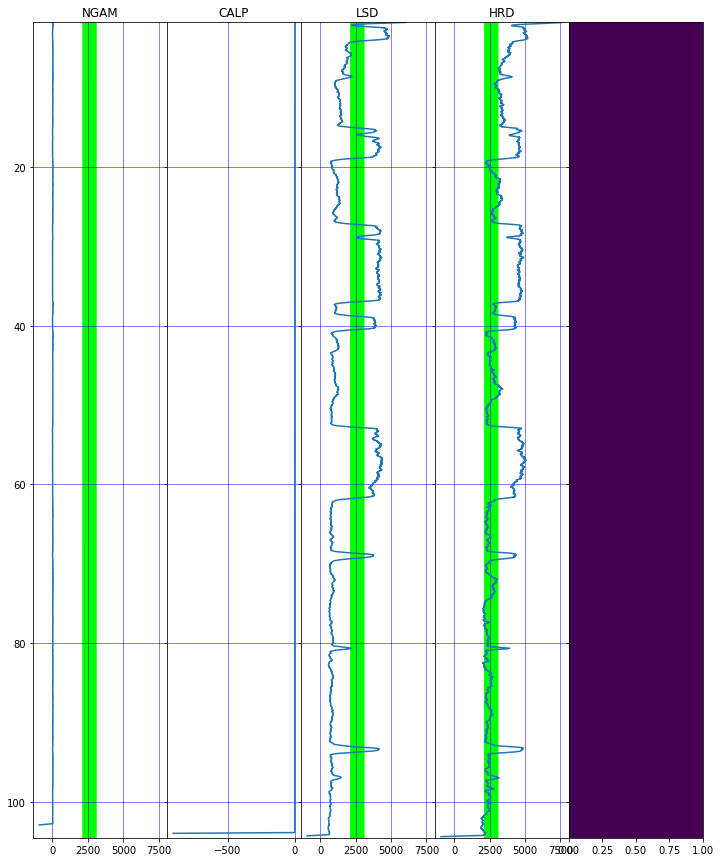

In [78]:
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(12,15),sharey=True)
mnemonic =['NGAM','CALP','LSD','HRD','FACIES']
rows,cols=1,5
for i in range(cols):
    if i < cols-1:
        ax[i].plot(data[:,i+1],data[:,0])
        ax[i].set_ylim(max(data[:,0]), min(data[:,0]))
        ax[i].grid(which='major',linestyle='-',linewidth=0.5,color='blue')
        ax[i].grid(which='minor',linestyle=':',linewidth=0.5,color='blue')
        ax[i].set_title('%s' %ok[i])
    elif i ==cols-1:
        F = np.vstack((facies,facies)).T
        ax[i].imshow(F, aspect='auto', extent=[0,1,max(data[:,0]), min(data[:,0])])
#mud line
m1 = data[:,4]
mud_line = m1*0+3125
ax[0].fill_betweenx(data[:,3],m1,mud_line, where=(m1>=mud_line),color='yellow',linewidth=0)
ax[0].fill_betweenx(data[:,3],m1,mud_line, where=(m1<mud_line),color='lime',linewidth=0)
ax[2].fill_betweenx(data[:,3],m1,mud_line, where=(m1>=mud_line),color='yellow',linewidth=0)
ax[2].fill_betweenx(data[:,3],m1,mud_line, where=(m1<mud_line),color='lime',linewidth=0)
ax[3].fill_betweenx(data[:,3],m1,mud_line, where=(m1>=mud_line),color='yellow',linewidth=0)
ax[3].fill_betweenx(data[:,3],m1,mud_line, where=(m1<mud_line),color='lime',linewidth=0)

plt.subplots_adjust(wspace=0)
plt.show()

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
data.to_csv('TPS_27.csv', index=False)
print(data)

In [3]:
from plotly import __version__
print(__version__)
%matplotlib inline
from plotly.offline import download_plotlyjs
from plotly.offline import init_notebook_mode
from plotly.offline import plot, iplot
import cufflinks as cf

4.9.0


In [4]:
init_notebook_mode(connected=True)
cf.go_offline()

In [41]:
from mpl_toolkits import mplot3d

In [5]:
df = pd.read_excel('Book1.xlsx')
df1= pd.DataFrame(df, columns=['DEPTH','NGAM','CALP','LSD','HRD'])

In [8]:
df2= pd.DataFrame(df, columns=['DEPTH','NGAM'])

In [9]:
df2[df2 < 0]=np.nan

In [10]:
df2

DEPTH   NGAM
0        1.76  42.65
1        1.77  40.88
2        1.78  40.15
3        1.79  40.15
4        1.80  37.94
...       ...    ...
10272  104.48    NaN
10273  104.49    NaN
10274  104.50    NaN
10275  104.51    NaN
10276  104.52    NaN

[10277 rows x 2 columns]

In [11]:
df2= pd.DataFrame(df, columns=['DEPTH','NGAM'])

In [12]:
df2.iplot(x='NGAM',y='DEPTH',size=10,color='red')

In [13]:
df3= pd.DataFrame(df, columns=['LSD','HRD'])

In [15]:
df3

LSD      HRD
0      6026.62  7659.56
1      5856.76  7602.94
2      5667.94  7515.88
3      5460.88  7425.44
4      5297.65  7371.32
...        ...      ...
10272  -999.25  -999.25
10273  -999.25  -999.25
10274  -999.25  -999.25
10275  -999.25  -999.25
10276  -999.25  -999.25

[10277 rows x 2 columns]

In [14]:
df3.iplot(kind='box')

In [27]:
df4= pd.DataFrame(df, columns=['LSD','DEPTH','NGAM'])

In [17]:
df5= pd.DataFrame(df, columns=['DEPTH'])
df5.iplot()

In [30]:
df4

LSD   DEPTH   NGAM
0      6026.62    1.76  42.65
1      5856.76    1.77  40.88
2      5667.94    1.78  40.15
3      5460.88    1.79  40.15
4      5297.65    1.80  37.94
...        ...     ...    ...
10272      NaN  104.48    NaN
10273      NaN  104.49    NaN
10274      NaN  104.50    NaN
10275      NaN  104.51    NaN
10276      NaN  104.52    NaN

[10277 rows x 3 columns]

In [29]:
df4[df4 < 0]=np.nan

In [63]:
df4.iplot(kind='bar')

In [59]:
df4.iplot(x= 'NGAM',y='LSD',kind='surface')
# x = depth
# y = hrd
# z = NGAM